# Reddit Preprocessing in Stages

This notebook is essentially the `reddit_preprocessor.py` file in the data package, but split into disjoint steps. This is useful for both development and visualization, e.g. you can save the data at each stage of the processing pipeline and resume later, rather than requiring a restart from beginning.

In [1]:
import os
import sys
sys.path.append('..')
from imp import reload

from data import reddit_preprocessor, DataHelper
from data.reddit_preprocessor import *

import json
import pandas as pd
from pprint import pprint

In [2]:
data_helper = DataHelper()

Using logfile: /tmp/data_helper_1xuld5d
Hi, I'm a DataHelper. For now, I help with the reddit dataset.
At any prompt, press ENTER if you want the default value.
Username (default='brandon'): 
Hello, brandon, I've set your data root to /home/brandon/Datasets/reddit
Years to process (default='2007,2008,2009'): 
These are the files I found:
['/home/brandon/Datasets/reddit/raw_data/2007/RC_2007-11',
 '/home/brandon/Datasets/reddit/raw_data/2007/RC_2007-12',
 '/home/brandon/Datasets/reddit/raw_data/2007/RC_2007-10',
 '/home/brandon/Datasets/reddit/raw_data/2008/RC_2008-12',
 '/home/brandon/Datasets/reddit/raw_data/2008/RC_2008-07',
 '/home/brandon/Datasets/reddit/raw_data/2008/RC_2008-08',
 '/home/brandon/Datasets/reddit/raw_data/2008/RC_2008-03',
 '/home/brandon/Datasets/reddit/raw_data/2008/RC_2008-06',
 '/home/brandon/Datasets/reddit/raw_data/2008/RC_2008-05',
 '/home/brandon/Datasets/reddit/raw_data/2008/RC_2008-09',
 '/home/brandon/Datasets/reddit/raw_data/2008/RC_2008-01',
 '/home/bra

### Playing with the Raw Data
Use data helper to load the uncompressed data into a pandas DataFrame.

In [11]:
data = {}
years = list(range(2008, 2010 + 1))
for year in range(2008, 2010 + 1):
    print('Loading year:', year)
    data[str(year)] = data_helper.load_random(year=year)
print('Done!')

Loading year: 2008
Returning data from file:
 /home/brandon/Datasets/reddit/raw_data/2008/RC_2008-11
Loading year: 2009
Returning data from file:
 /home/brandon/Datasets/reddit/raw_data/2009/RC_2009-08
Loading year: 2010
Returning data from file:
 /home/brandon/Datasets/reddit/raw_data/2010/RC_2010-03
Done!


Remove entries with the comment as "deleted".

In [26]:
years = list(range(2008, 2010 + 1))
for year in years:
    df = data[str(year)]
    data[str(year)] = df.loc[df.body != '[deleted]'].reset_index(drop=True)

In [27]:
jtplot.style('onedork', ticks=True, fscale=1.5)
jtplot.figsize(x=11., y=8.)

# Plot the inner 90 of data for 'score'. 
years = ['2008', '2009', '2010']
score_ranges = [tuple(data[y].score.quantile([0.05, .95])) for y in years]
print(score_ranges)

[(-1.0, 15.0), (-1.0, 15.0), (0.0, 13.0)]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from jupyterthemes import jtplot
jtplot.style('monokai')
# set "context" (paper, notebook, talk, or poster)
# & font scale (scalar applied to labels, legend, etc.)
jtplot.style(ticks=True, grid=False)
jtplot.figsize(x=10, y=8)

In [29]:
# [Optional] cut down size of data.
percent_keep = 0.9
for year in range(2008, 2010 + 1):
    print('Loading year:', year)
    num_keep = int(percent_keep * len(data[str(year)].index))
    data[str(year)] = data[str(year)].loc[:num_keep]

Loading year: 2008
Loading year: 2009
Loading year: 2010


In [30]:
df_small.columns

Index(['archived', 'author', 'author_flair_css_class', 'author_flair_text',
       'body', 'controversiality', 'created_utc', 'distinguished', 'downs',
       'edited', 'gilded', 'id', 'link_id', 'name', 'parent_id',
       'removal_reason', 'retrieved_on', 'score', 'score_hidden', 'subreddit',
       'subreddit_id', 'ups'],
      dtype='object')

## Visualization: Comment Scores

[(-1.0, 15.0), (-1.0, 15.0), (0.0, 13.0)]
sr: [-1.0, 15.0]
nb: 17


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


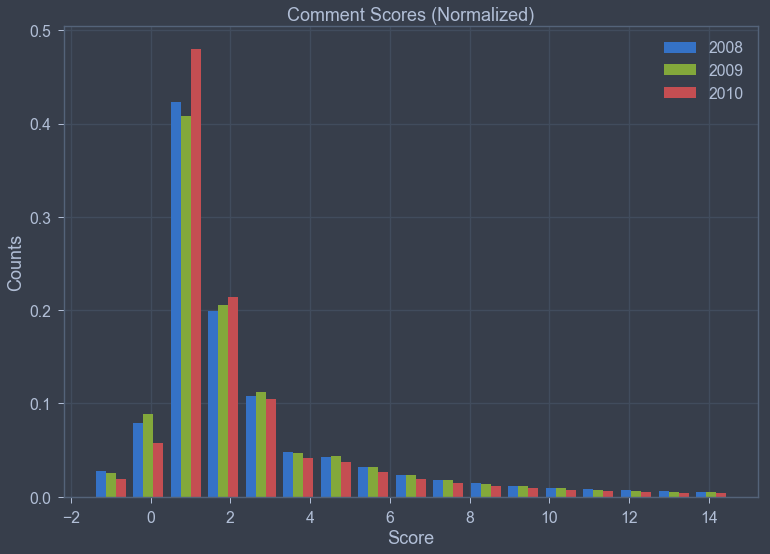

In [31]:
jtplot.style('onedork', ticks=True, fscale=1.5)
jtplot.figsize(x=11., y=8.)

# Plot the inner 90 of data for 'score'. 
years = ['2008', '2009', '2010']
score_ranges = [tuple(data[y].score.quantile([0.05, .95])) for y in years]
print(score_ranges)

# Pick the widest range to fit all data in plot.
from operator import itemgetter
score_range = [min(score_ranges, key=itemgetter(0))[0],
               max(score_ranges, key=itemgetter(1))[1]]
print('sr:', score_range)
num_bins = int(score_range[1] - score_range[0] + 1)
print('nb:', num_bins)

score_data = [data[y].score for y in years]
plt.hist(score_data,
         bins=num_bins,
         normed=True,
         align='left',
         label=years,
         range=score_range)

plt.title('Comment Scores (Normalized)')
plt.xlabel('Score')
plt.ylabel('Counts')
plt.legend()
plt.show()

### Visualization: Word Distributions

In [4]:
from nltk import word_tokenize
from collections import Counter
from itertools import chain

jtplot.style('onedork', ticks=True, fscale=1.5)
jtplot.figsize(x=11., y=8.)

#$word_tokenize(data['2008'].loc[0, 'body'])
pd.set_option('display.max_colwidth', 1000)
#pd.DataFrame(data['2008']['body']).head()

In [ ]:
from nltk import FreqDist

wt = Counter(chain.from_iterable(data['2008']['body']))

In [64]:
tokenized = parallel_map_list(fn=DataHelper.word_tokenizer, 
                              iterable=data['2008'].body.values)
print('DONE')

Time to run parallel_map_list: 13.947 seconds.
DONE


In [ ]:
data_helper.set_word_freq(Counter(chain.from_iterable(tokenized)))

In [74]:
most_comm = data_helper.word_freq.most_common(20)
words, counts = zip(*most_comm)

x_labels = words
counts_series = pd.Series.from_array(counts)

plt.figure(figsize=(16, 10))
ax = counts_series.plot(kind='bar')
ax.set_title('Most Common Words 2008')
ax.set_ylabel('Counts')
ax.set_xlabel('Words')
ax.set_xticklabels(x_labels)

## JSON from TensorBoard (Loss/Acc)

In [30]:
# --------------------------------------------------------
# Globals
# --------------------------------------------------------
BASE_DIR = '/home/brandon/Downloads'
ACC_DIR = os.path.join(BASE_DIR, 'accuracy_json')
TRAIN_DIR = os.path.join(BASE_DIR, 'train_loss_json')
VALID_DIR = os.path.join(BASE_DIR, 'valid_loss_json')
COL_NAMES =  ['wall_time', 'iteration']

run_keys = ['sota', 'basicAttention', 'deep', 'talkativeGRU']

df_acc = {}
df_train = {}
df_valid = {}

for k in run_keys:
    fname = 'run-'+k+'-tag-evaluation_accuracy.json'
    df_acc[k] = pd.read_json(os.path.join(ACC_DIR, fname))
    
    fname = 'run-'+k+'-tag-evaluation_loss_train.json'
    df_train[k] = pd.read_json(os.path.join(TRAIN_DIR, fname))
    
    fname = 'run-'+k+'-tag-evaluation_loss_valid.json'
    df_valid[k] = pd.read_json(os.path.join(VALID_DIR, fname))
    
    df_acc[k].columns = COL_NAMES + ['accuracy']
    df_train[k].columns = COL_NAMES + ['training loss']
    df_valid[k].columns = COL_NAMES + ['validation loss']

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


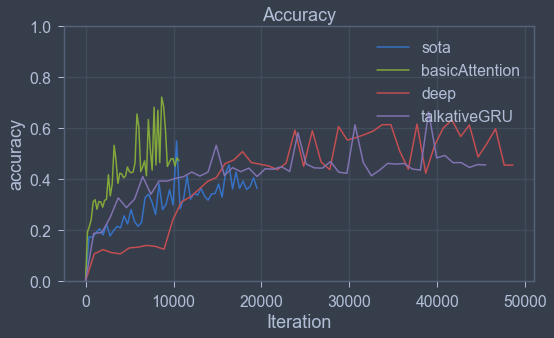

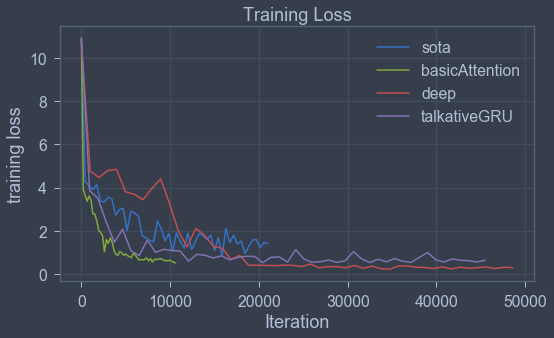

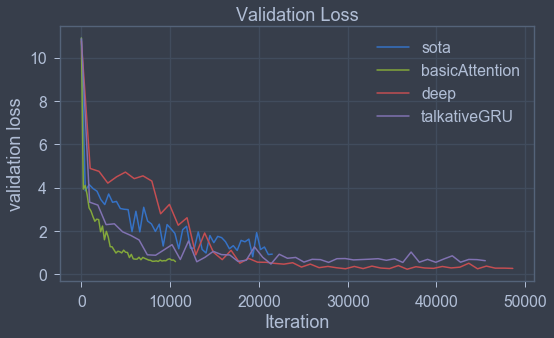

In [31]:
from scipy.interpolate import spline
def plot_df(df, y_name, run_key):
    """Assuming df is from tensorboard json . . . """

    iters = df.iteration
    iters_new = np.linspace(iters.min(), iters.max(), 50)
    smooth_y = spline(iters, df[y_name], iters_new)
    plt.plot(iters_new, smooth_y, label=run_key)
    plt.title(y_name.title())
    plt.ylabel(y_name)
    if y_name == 'accuracy':
        plt.ylim([0., 1.])
    plt.xlabel('Iteration')
    plt.legend(loc='upper right')

def plot_runs(df_dict, y_name):
    plt.figure(figsize=(8, 5))
    for k in run_keys:
        plot_df(df_dict[k], y_name, k)
        
plot_runs(df_acc, 'accuracy')
plot_runs(df_train, 'training loss')
plot_runs(df_valid, 'validation loss')
plt.show()

# Preprocessing

In [3]:
PROJECT_ROOT = '/home/brandon/Documents/DeepChatModels'
REDDIT_DIR = '/home/brandon/Datasets/reddit'
SOURCE_DIR = os.path.join(REDDIT_DIR, 'raw_data')
TARGET_DIR = os.path.join(REDDIT_DIR, 'raw_data_columns_removed')
YEAR = '2009'
TARGET_FILE = os.path.join(TARGET_DIR, YEAR + '_cols_removed.json')

In [ ]:
data_helper = DataHelper()

In [ ]:
data_helper.file_counter = 9
print(data_helper.file_paths[data_helper.file_counter:])

## Load 2007 Data in DF

In [ ]:
df = data_helper.safe_load()

In [ ]:
print("df has {} rows.".format(len(df.index)))
print("df has columns:\n", df.columns)
df.body.head()

In [ ]:
df = remove_extra_columns(df)

In [ ]:
print("df has {} rows.".format(len(df.index)))
print("df has columns:\n", df.columns)
df.head()

In [ ]:
DataHelper.df_to_json(df, orient='records', lines=False, target_file=TARGET_FILE)

## In One Function

In [ ]:
def remove_extra_columns_and_save()
    print("Removing extra columns . . . ")
    df = remove_extra_columns(df)
    print("Saving to {} . . . ".format(TARGET_FILE))
    DataHelper.df_to_json(
        df, 
        orient='records', 
        lines=False, 
        target_file=TARGET_FILE)
    print("Done!")

### Loading back later

In [ ]:
df_loaded = pd.read_json(target_file)

In [ ]:
len(df_loaded)

In [ ]:
file_names = []
for y in ['2007', '2008', '2009']:
    file_names.append(y + '_cols_removed.json')
file_names = file_names[:-1]
#file_names[-1] = '2009_cols_removed_part_1.json'
#file_names.append('2009_cols_removed_part_2.json')
file_names = [os.path.join(TARGET_DIR, fname) for fname in file_names]
pprint(file_names)

In [ ]:
list_ = []
for file_path in file_names:
    print('file:', file_path)
    sys.stdout.flush()
    list_.append(pd.read_json(file_path))
df = pd.concat(list_).reset_index()
del list_
list_ = None

In [ ]:
TARGET_FILE = os.path.join(TARGET_DIR, '2007-8_cols_removed.json')
DataHelper.df_to_json(df, orient='records', lines=False, target_file=TARGET_FILE)

# Stage 2: Regex, Long Comments, and Contractions

### Regex

In [4]:
TARGET_FILE = os.path.join(TARGET_DIR, YEAR+'_cols_removed_part_1.json')
df = pd.read_json(TARGET_FILE)
print('DataFrame loaded.')

DataFrame loaded.


In [5]:
from data.reddit_preprocessor import regex_replacements
df = regex_replacements(df)
print('Regex replacements done.')

Time to run regex_replacements: 583.041 seconds.
Regex replacements done.


In [ ]:
TARGET_FILE = os.path.join(TARGET_DIR, '2007-8_regex_replaced.json')
DataHelper.df_to_json(df, orient='records', lines=False, target_file=TARGET_FILE)

### Long Comments

In [ ]:
TARGET_FILE = os.path.join(TARGET_DIR, '2007-8_regex_replaced.json')
df = pd.read_json(TARGET_FILE)
print('DataFrame loaded from', TARGET_FILE)

In [ ]:
reload(data)
from data.reddit_preprocessor import remove_large_comments, expand_contractions
df = remove_large_comments(df=df, max_len=20)
df = expand_contractions(df)
print('Remove large comments and contractions done.')

TARGET_FILE = os.path.join(TARGET_DIR, YEAR+'_large_comments_contractions.json')
DataHelper.df_to_json(df, orient='records', lines=False, target_file=TARGET_FILE)

print('done')

# Stage 3: Parallel Calls

In [4]:
from data.reddit_preprocessor import parallel_map_list
from data.reddit_preprocessor import data_helper
TARGET_FILE = os.path.join(TARGET_DIR, '2007-8_large_comments_contractions.json')
df = pd.read_json(TARGET_FILE)
print('DataFrame loaded from', TARGET_FILE)

DataFrame loaded from /home/brandon/Datasets/reddit/raw_data_columns_removed/2007-8_large_comments_contractions.json


In [7]:
from collections import Counter
from itertools import chain
sentences = parallel_map_list(fn=DataHelper.word_tokenizer, iterable=df.body.values)
data_helper.set_word_freq(Counter(chain.from_iterable(sentences)))

Time to run parallel_map_list: 19.272 seconds.


In [8]:
from data.reddit_preprocessor import sentence_score
df['score'] = parallel_map_list(fn=sentence_score, iterable=sentences)
del sentences

Time to run parallel_map_list: 215.748 seconds.


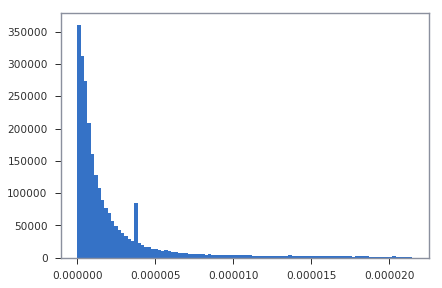

In [23]:
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style('onedork')
jtplot.style(ticks=True, grid=False)
jtplot.figsize(aspect=1.2)
plt.hist(df['score'].values, bins=100,
        range=(0., df['score'].quantile(0.7)))
plt.show()

# Final Stage

In [25]:
# Keep the desired percentage of lowest-scored sentences. (low == good)
from data.reddit_preprocessor import children_dict
keep_best_percent = 0.7
df = df.loc[df['score'] < df['score'].quantile(keep_best_percent)]

print('Prepping for the grand finale.')
comments_dict = pd.Series(df.body.values, index=df.name).to_dict()
root_to_children = children_dict(df)
data_helper.generate_files(
            from_file_path="from_file.txt",
            to_file_path="to_file.txt",
            root_to_children=root_to_children,
            comments_dict=comments_dict)

Prepping for the grand finale.
Time to run children_dict: 4.701 seconds.
Final processed file has 306164 samples total.


# Exploration

In [ ]:
df.style.set_properties(subset=['text'], **{'width': '800px'})
def get_comments(df, n=10):
    i = 0
    while i < len(df.index):
        yield df.loc[i:i+n]['body']
        i += n

In [ ]:
gen = get_comments(df, 5)

In [ ]:
comments = next(gen)
for comment in comments:
    print(comment)